D:\school\se1_year4\IntSys\tieu_luan\code\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
846/846 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9186 - loss: 0.2653 - val_accuracy: 0.9671 - val_loss: 0.1083
Epoch 2/5
846/846 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9735 - loss: 0.0917 - val_accuracy: 0.9727 - val_loss: 0.0958
Epoch 3/5
846/846 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9805 - loss: 0.0645 - val_accuracy: 0.9732 - val_loss: 0.0955
Epoch 4/5
846/846 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9720 - val_loss: 0.0982
Epoch 5/5
846/846 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9772 - val_loss: 0.1060
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9910 - loss: 0.0274
Test accuracy: 0.9909999966621399


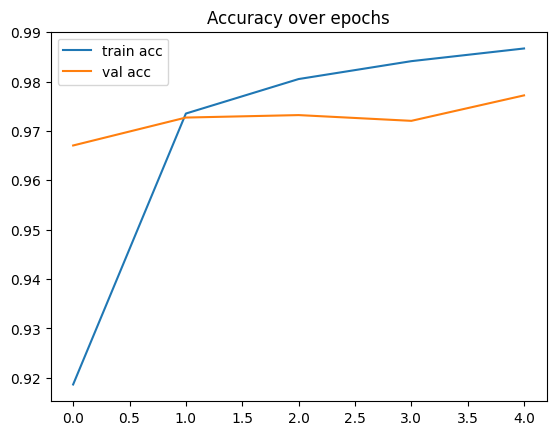

In [1]:
from keras.src.utils import to_categorical
# Nguyễn Việt Quang B22DCCN650
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Tải dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Nguyễn Việt Quang B22DCCN650
# tạo thêm 100 data
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import random
new_images = []
new_labels = []
for _ in range(100):
    img = Image.new('L', (28, 28), color=0)
    draw = ImageDraw.Draw(img)
    digit = random.randint(0, 9)   # Lưu dưới dạng số
    draw.text((5, 2), str(digit), fill=255)
    new_images.append(np.array(img))
    new_labels.append(digit)
new_images = np.array(new_images)
new_labels = np.array(new_labels)
# plt.figure(figsize=(8,8))
# for i in range(100):
#     plt.subplot(10, 10, i+1)
#     plt.imshow(new_images[i], cmap='gray')
#     plt.axis("off")
# plt.show()
x_train = np.concatenate([x_train, new_images], axis=0)
y_train = np.concatenate([y_train, new_labels], axis=0)



# Nguyễn Việt Quang B22DCCN650
# import collections

# counter = collections.Counter(y_train)

# plt.bar(counter.keys(), counter.values())
# plt.title("Phân bố nhãn MNIST (training set)")
# plt.xlabel("Digit")
# plt.ylabel("Số lượng ảnh")
# plt.show()

# Nguyễn Việt Quang
# Chuẩn hóa dữ liệu về [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Nguyễn Việt Quang B22DCCN650
# Thêm kênh màu (channel) cho dữ liệu
x_train = np.expand_dims(x_train, -1)  # Kích thước mới: (num_samples, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)   # Kích thước mới: (num_samples, 28, 28, 1)

# Nguyễn Việt Quang B22DCCN650
# One-hot labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Xây dựng mô hình CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# Nguyễn Việt Quang B22DCCN650
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Nguyễn Việt Quang B22DCCN650
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Nguyễn Việt Quang B22DCCN650
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Nguyễn Việt Quang B22DCCN650
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()


Epoch 1: Train Acc = 0.9089 | Val Acc = 0.9785
Epoch 2: Train Acc = 0.9704 | Val Acc = 0.9859
Epoch 3: Train Acc = 0.9777 | Val Acc = 0.9870
Epoch 4: Train Acc = 0.9803 | Val Acc = 0.9894
Epoch 5: Train Acc = 0.9839 | Val Acc = 0.9897

Test accuracy: 0.989799976348877



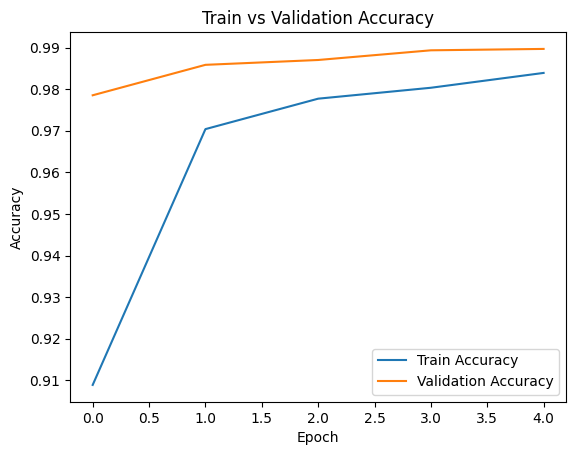

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist   # chỉ dùng để load data, KHÔNG dùng keras model
from PIL import Image, ImageDraw
import random


# =============================
# 1. Load dữ liệu MNIST
# =============================
(x_train, y_train), (x_test, y_test) = mnist.load_data() # trả về numpy

# Tạo thêm 100 ảnh tự vẽ bằng PIL
new_images = []
new_labels = []
for _ in range(100):
    img = Image.new('L', (28, 28), color=0) # L: ảnh grayscale, 0: ảnh màu đen
    draw = ImageDraw.Draw(img) # tạo đối tượng draw
    digit = random.randint(0, 9)
    draw.text((5, 2), str(digit), fill=255) # (tọa độ, nội dung, màu trắng)
    new_images.append(np.array(img)) # Chuyển ảnh PIL sang mảng numpy
    new_labels.append(digit)

# Ghép vào MNIST
new_images = np.array(new_images)
new_labels = np.array(new_labels)

x_train = np.concatenate([x_train, new_images])
y_train = np.concatenate([y_train, new_labels])

# Normalize
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

# Add channel dimension
x_train = np.expand_dims(x_train, -1)  # (N,28,28,1), mạng neuron cần input có 4 kênh
x_test  = np.expand_dims(x_test, -1)

# One-hot labels
y_train = tf.one_hot(y_train, 10).numpy()
y_test  = tf.one_hot(y_test, 10).numpy()


# =============================
# 2. Tách validation set (10%)
# Nguyễn Việt Quang B22DCCN650
# =============================
val_size = int(0.1 * x_train.shape[0])

x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train = x_train[val_size:]
y_train = y_train[val_size:]

num_samples = x_train.shape[0]


# =============================
# 3. Xây CNN bằng TensorFlow thuần
# Nguyễn Việt Quang B22DCCN650
# =============================
class CNN(tf.Module):
    def __init__(self):
        super().__init__()

        # Conv 1
        self.conv1 = tf.Variable(tf.random.normal([3, 3, 1, 32], stddev=0.1)) # 1 là số chanel đầu vào

        # Conv 2
        self.conv2 = tf.Variable(tf.random.normal([3, 3, 32, 64], stddev=0.1))

        # Dense 1
        self.w1 = tf.Variable(tf.random.normal([64*5*5, 128], stddev=0.1))
        self.b1 = tf.Variable(tf.zeros([128]))

        # Dense 2
        self.w2 = tf.Variable(tf.random.normal([128, 10], stddev=0.1))
        self.b2 = tf.Variable(tf.zeros([10]))
    # Nguyễn Việt Quang B22DCCN650
    def __call__(self, x, training=True):
        # Conv1
        x = tf.nn.conv2d(x, self.conv1, strides=1, padding="VALID")
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=2, strides=2, padding="VALID")

        # Conv2
        x = tf.nn.conv2d(x, self.conv2, strides=1, padding="VALID")
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=2, strides=2, padding="VALID")

        # Flatten
        x = tf.reshape(x, [-1, 64*5*5]) #Chuyển tensor 4D (batch, 5,5,64) → 2D (batch, 64*5*5)

        # Dense1
        x = tf.nn.relu(tf.matmul(x, self.w1) + self.b1)

        if training:
            x = tf.nn.dropout(x, rate=0.5)

        return tf.matmul(x, self.w2) + self.b2



model = CNN()
optimizer = tf.optimizers.Adam(0.001)
loss_fn = tf.nn.softmax_cross_entropy_with_logits


# =============================
# 4. Training Loop
# Nguyễn Việt Quang B22DCCN650
# =============================
batch_size = 64
epochs = 5
steps = num_samples // batch_size

train_acc_history = []
val_acc_history = []

# Nguyễn Việt Quang B22DCCN650
for epoch in range(epochs):
    # Shuffle train data
    idx = np.random.permutation(num_samples)
    x_train = x_train[idx]
    y_train = y_train[idx]
    correct = 0
    total = 0
    # ---- Training ----
    for step in range(steps):
        x_batch = x_train[step*batch_size:(step+1)*batch_size]
        y_batch = y_train[step*batch_size:(step+1)*batch_size]

        with tf.GradientTape() as tape: # theo dõi tất cả biến có trainable variables để tính gradient
            logits = model(x_batch, training=True)
            loss = tf.reduce_mean(loss_fn(y_batch, logits))

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        preds = tf.argmax(logits, axis=1)
        labels = tf.argmax(y_batch, axis=1)
        correct += tf.reduce_sum(tf.cast(preds == labels, tf.int32))
        total += x_batch.shape[0]

    train_acc = correct / total
    train_acc_history.append(train_acc)

    # ---- Validation ----
    logits_val = model(x_val, training=False)
    preds_val = tf.argmax(logits_val, axis=1)
    labels_val = tf.argmax(y_val, axis=1)
    val_acc = tf.reduce_mean(tf.cast(preds_val == labels_val, tf.float32))
    val_acc_history.append(val_acc)

    print(f"Epoch {epoch+1}: Train Acc = {train_acc:.4f} | Val Acc = {val_acc:.4f}")


# =============================
# 5. Evaluate Test Accuracy
# Nguyễn Việt Quang B22DCCN650
# =============================
logits_test = model(x_test, training=False)
preds_test = tf.argmax(logits_test, axis=1)
labels_test = tf.argmax(y_test, axis=1)
test_acc = tf.reduce_mean(tf.cast(preds_test == labels_test, tf.float32))

print("\n==============================")
print("Test accuracy:", float(test_acc))
print("==============================\n")


# =============================
# 6. Vẽ biểu đồ Train vs Val Accuracy
# Nguyễn Việt Quang B22DCCN650
# =============================
plt.plot(train_acc_history, label="Train Accuracy")
plt.plot(val_acc_history, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.show()
